## Observations and Insights 

1. The Summary Statistics dataframe shows both Capomulin and Ramicane have the smallest Mean tumor size of all the drug regimen tested, with mean tumor volumes of 40.67 and 40.21 respectively. Looking further, Ramicane has a slightly lower variance 23.46 vs Capomulin at 24.94.  The small variance indicates that Ramicane data points are closer to the mean that that of Capomulin. The other drugs in their cohort showed tumor volumes that were 28% to 37% larger. 
1. The drug regimen bar charts show that both Capumulin and Ramicane have a higher number of measurements than their cohorts. A higher number of measurements could allow for improved precision of the estimates and in the strength of the study.   
1. In examining the IQR results, both Capumulin and Ramicane don't have any outliers. There is a mixed picture when looking at the lower, upper and median quartile for tumor volume. The numbers are close enough that one can't discern which drug has the best results. However, when compared to their cohorts, both had significantly lower Q1 and Q3 ranges. 
1. The boxplot paints a clear picture, visually dipicting Capumulin and Ramicane had lower tumor volumes than the cohort. The boxplot also shows that Infubinol has an outlier below its minimum IQR.
1. Using scipy pearsonr, the calculated result of 0.842, shows a correlation between mouse #j246 weight and average tumor volume. The scatter chart with line regression further confirmed that as the weight of the mouse increased, so did the tumor. This was also verified by the regression line that was calculated and overlayed on top of the scatter chart.
1. The data shows that both Capumulin and Ramicane had a significant impact in reducing tumor size over those in their cohort.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import dataframe_image as dfi
from pandas import DataFrame

**Raw Data**

In [2]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display
df_mouse_merge = mouse_metadata.merge(study_results, left_on = 'Mouse ID', right_on = 'Mouse ID')
df_mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


**Data Verification & Dataframe Cleanup**

In [3]:
# Checking the number of mice.
mouse_qty = len(pd.unique(df_mouse_merge['Mouse ID']))
print(mouse_qty)

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_mouse_merge.loc[df_mouse_merge.duplicated(subset=[
    'Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_mouse)

249
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
show_duplicates = df_mouse_merge.loc[df_mouse_merge['Mouse ID'] == 'g989']
show_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = df_mouse_merge.drop_duplicates().reset_index(drop=True)
clean_df = clean_mouse[clean_mouse['Mouse ID'].isin(duplicate_mouse)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_qty = clean_df['Mouse ID'].nunique()
mouse_qty

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_stat= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean_stat, 'Median': median_stat, 'Variance': 
                           var_stat, 'Std. Dev.': stdv_stat, 'SEM': sem_stat})
dfi.export(summary_df, '../Images/sum_stats.png')   # Export dataframe as image
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Create summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen using the aggregation method, 
# produce the same summary statistics in a single line
agg_group = clean_df.groupby('Drug Regimen')
agg_summary = agg_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_summary.rename(columns = {'mean':'Mean', 'median':'Median',
                              'var':'Variance', 'std':'Std. Dev.', 'sem':'SEM'}, inplace = True)
agg_summary.head()

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

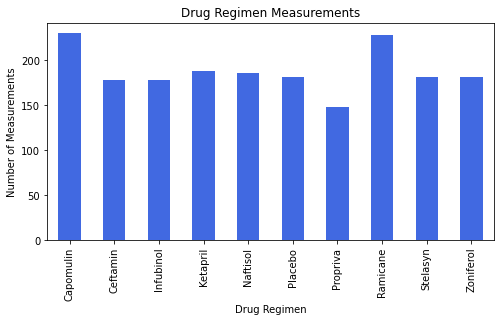

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df = clean_df.groupby(['Drug Regimen']).count().reset_index()
regimen_data = regimen_df[['Drug Regimen', 'Mouse ID']].rename(columns={'Mouse ID': 'Count'})
regimen_data = regimen_data.set_index('Drug Regimen')
regimen_data.plot(kind='bar', color='royalblue', figsize=(8,4,))

plt.grid(b=False)  # hide grid lines
plt.ylabel('Number of Measurements')

plt.gca().get_legend().remove()  # turn legend off
#plt.gca().get_bar().set_color('royalblue')
plt.title('Drug Regimen Measurements')
plt.show()

<BarContainer object of 10 artists>

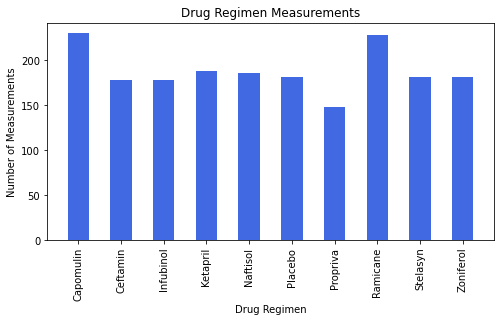

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# create drug regiment data set
regimen_list = summary_df.index.tolist()
x_axis = regimen_list

# Create regimen count
regimen_count = (clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
fig = plt.figure(figsize =(8, 4))  # format figure Size

# Format title
plt.title('Drug Regimen Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)
plt.grid(b=False)   # hide grid lines

# Plot bar chart
plt.bar(x_axis, regimen_count, color='royalblue', alpha=1, width=.5, align='center')
#plt.tight_layout()

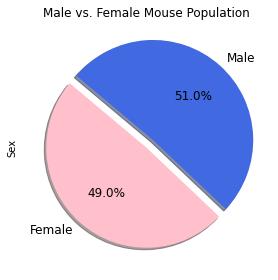

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df.groupby('Sex')
gender_count = pd.DataFrame(gender_count['Sex'].count())

# Plot
gender_count.plot(kind='pie', y='Sex', figsize=(4, 4),\
                  title='Male vs. Female Mouse Population',startangle=140,\
                  autopct="%1.1f%%", shadow=True, fontsize=12, colors=['pink', 'royalblue'], 
                  explode=(0,0.1), legend=False)
plt.tight_layout()

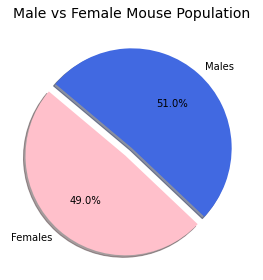

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_df.groupby(['Sex'])['Mouse ID'].count()).tolist()
plt.figure(figsize=(4,4))

# labels for the sections of the pie chart
labels = ['Females', 'Males']
plt.title('Male vs Female Mouse Population', fontsize = 14)

sizes = gender_count            # The values of each section of the pie chart
colors = ['#ff9999','#66b3ff']  # Colors each section of the pie chart
explode = (0.1, 0)              # Tells matplotlib not to seperate the sections

# Creates the pie chart based upon the values above and automatically finds % of each part of chart
plt.pie(sizes, explode=explode, labels=labels, colors=['pink', 'royalblue'],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_max = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_max = pd.merge(df_max, clean_df, on=('Mouse ID', 'Timepoint'), how='left')
df_max.head()     # Preview data table

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


**Isolate Four Key Drugs**

In [40]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter df_max down to four key drugs
key_drugs =df_max[df_max['Drug Regimen'].isin(drug_list)]

# Slice data by groupby and isolate to largest tumor volume size
four_tumors = key_drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)

# Reshape by stacking (pivoting) column Drug Regimen and Mouse ID to 1st level and remove null
#NaN are ignored in calulations, including pd.quantile
drugs_stacked = four_tumors.stack(level=-1, dropna=False).unstack(level=0)
drugs_stacked.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.97,NaN
a251,Last_tumor_size,NaN,NaN,65.53,NaN
a275,Last_tumor_size,NaN,63.0,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.41
a444,Last_tumor_size,NaN,NaN,NaN,43.05


In [52]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = drugs_stacked[drug].quantile([.25,.5,.75])
    lowerquart = quartiles[.25]
    upperquart = quartiles[.75]
    iqr = upperquart-lowerquart
    low = lowerquart - (1.5*iqr)
    high = round(upperquart + (1.5*iqr))
    
    print(f'{drug} IQR data is:')
    print(f'The lo%%fileer quartile of the tumor volume for {drug} is: {lowerquart}')
    print(f'The upper quartile of the tumor volume for {drug} is: {upperquart}')
    print(f'The interquartile range of the tumor volume for {drug} is: {iqr}')
    print(f'The the median of tumor the tumor volume for {drug} is: {quartiles[.5]} ')
    print(f'Values for {drug}, below {low}, could be outliers.')
    print(f'Values for {drug}, above {high}, could be outliers.')
    print('\n')

Capomulin IQR data is:
The lo%%fileer quartile of the tumor volume for Capomulin is: 32.38
The upper quartile of the tumor volume for Capomulin is: 40.16
The interquartile range of the tumor volume for Capomulin is: 7.779999999999994
The the median of tumor the tumor volume for Capomulin is: 38.13 
Values for Capomulin, below 20.71000000000001, could be outliers.
Values for Capomulin, above 52.0, could be outliers.


Ramicane IQR data is:
The lo%%fileer quartile of the tumor volume for Ramicane is: 31.56
The upper quartile of the tumor volume for Ramicane is: 40.66
The interquartile range of the tumor volume for Ramicane is: 9.099999999999998
The the median of tumor the tumor volume for Ramicane is: 36.56 
Values for Ramicane, below 17.910000000000004, could be outliers.
Values for Ramicane, above 54.0, could be outliers.


Infubinol IQR data is:
The lo%%fileer quartile of the tumor volume for Infubinol is: 54.05
The upper quartile of the tumor volume for Infubinol is: 65.53
The interq

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [22]:
# Select mouse treated with Capomulin and display data
line_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 'j246',:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
310,j246,Capomulin,Female,21,21,0,45.000000,0
311,j246,Capomulin,Female,21,21,5,45.641438,0
312,j246,Capomulin,Female,21,21,10,46.408361,0
313,j246,Capomulin,Female,21,21,15,43.312654,0
314,j246,Capomulin,Female,21,21,20,44.020370,0


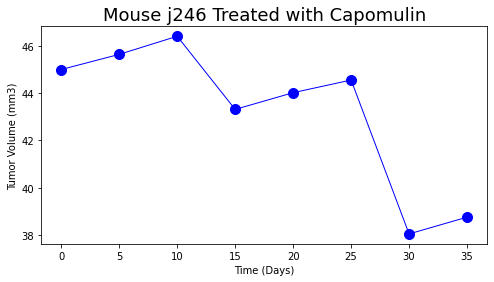

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse #j246
x_axis = line_df['Timepoint']
y_axis = line_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(8, 4))   # Plot size
plt.plot(x_axis, y_axis,linewidth=1, markersize=10,marker="o",color="blue")
plt.title('Mouse j246 Treated with Capomulin',fontsize = 18)
plt.xlabel('Time (Days)',fontsize = 10)
plt.ylabel('Tumor Volume (mm3)',fontsize = 10)
plt.show()

## Correlation and Regression

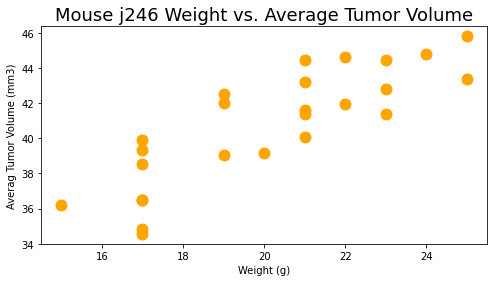

In [24]:
# Create scatter plot of tumor volume vs mouse weight for Capomulin treatment 
avg_capo_data = Capomulin_df.groupby(['Mouse ID']).mean()
x_val = avg_capo_data['Weight (g)']
y_val = avg_capo_data['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(8, 4))   # Plot size
plt.scatter(x_val,y_val, s=120, color='orange')
plt.title('Mouse j246 Weight vs. Average Tumor Volume',fontsize =18)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)
plt.show()

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr, _= pearsonr(x_val,y_val)
print(f'The correlation between #j246 weight and average tumor volume is: %.3f' % corr)

# use lingress to find the values used to derive values for the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regression_val = x_val*slope+intercept
print('\n')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Rvalue (Correlation Coefficient): {rvalue}')
print(f'Scipy Pearnsonr (Correlation Coefficeint):  %.2f%%' % corr)
print(f'Pvalue: {pvalue}')
print(f'Stderr: {stderr}')

The correlation between #j246 weight and average tumor volume is: 0.842


Slope: 0.9544396890241045
Intercept: 21.552160532685015
Rvalue (Correlation Coefficient): 0.8419363424694718
Scipy Pearnsonr (Correlation Coefficeint):  0.84%
Pvalue: 1.3225722434712642e-07
Stderr: 0.1275435903320134


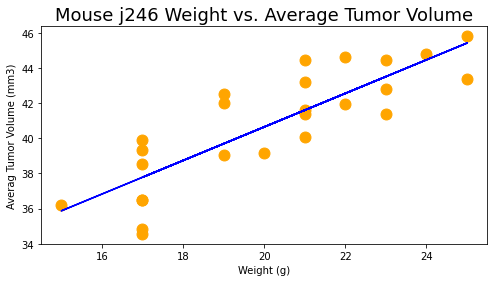

In [26]:
# Using linear regression values, plot the linear regression model on top of the previous scatter plot. 
fig1, ax1 = plt.subplots(figsize=(8, 4))   # Plot size
plt.scatter(x_val,y_val, s=120, color='orange')
plt.title('Mouse j246 Weight vs. Average Tumor Volume',fontsize =18)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)
plt.plot(x_val,regression_val,'b-')
plt.savefig('../Images/linear_regression.png', bbox_inches = 'tight')
plt.show()

**Challenging Myself**

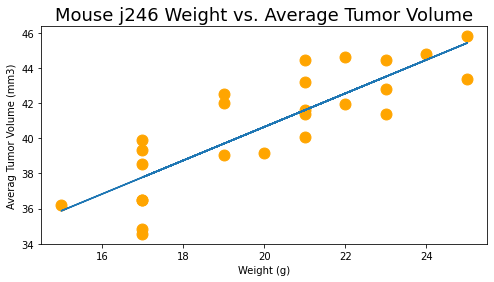

In [27]:
# Used numpy polyfit to calculate the slope-intercept for the linear regression line
fig1, ax1 = plt.subplots(figsize=(8, 4))   # Plot size
plt.scatter(x_val,y_val, s=120, color='orange')
plt.title('Mouse j246 Weight vs. Average Tumor Volume',fontsize =18)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

# Get slope and intercept for linear regression line (LRL)
m, b = np.polyfit(x_val,y_val, 1)

# add LRL to scatter plot
plt.plot(x_val, m*x_val+b)
plt.show()